**Chuẩn bị**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cài đặt mô hình yolov7
%cd /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay
!pwd
!git clone https://github.com/WongKinYiu/yolov7.git

/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay
/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay
Cloning into 'yolov7'...
remote: Enumerating objects: 1127, done.
remote: Total 1127 (delta 0), reused 0 (delta 0), pack-reused 1127
Receiving objects: 100% (1127/1127), 69.93 MiB | 12.28 MiB/s, done.
Resolving deltas: 100% (522/522), done.
Updating files: 100% (104/104), done.


In [ ]:
# Cài đặt các yêu cầu trong file requirements.txt
# Có thể cần chạy lại khi thực hiện việc gì đó trên gg colab
%cd /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
!pip install -r requirements.txt

/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.8 MB/s eta 0:00:00


In [ ]:
# cấu trúc lại dataset
# không cần chạy lại
%cd /content/drive/MyDrive/NhanDienBienSoXeMay/data/GreenParking
!mkdir images
!mkdir lables
!mv *.jpg *.jpeg images
!mv *.txt lables

/content/drive/MyDrive/NhanDienBienSoXeMay/data/GreenParking
mv: cannot stat '*.jpg': No such file or directory
mv: cannot stat '*.jpeg': No such file or directory
mv: cannot stat '*.txt': No such file or directory


In [ ]:
# tạo file yaml
%cd /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/data
!rm mydataset.yaml
!echo "train: /content/drive/MyDrive/NhanDienBienSoXeMay/data/MotorcycleLicensePlate/train" >> mydataset.yaml
!echo "val: /content/drive/MyDrive/NhanDienBienSoXeMay/data/MotorcycleLicensePlate/valid" >> mydataset.yaml
!echo "test: /content/drive/MyDrive/NhanDienBienSoXeMay/data/MotorcycleLicensePlate/test" >> mydataset.yaml
!echo "nc: 1" >> mydataset.yaml
!echo "names: ['Bien so']" >> mydataset.yaml

/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/data


In [ ]:
# huấn luyện mô hình
# exp10, 14
%cd /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
!python train.py --batch 9 --cfg cfg/training/yolov7-tiny.yaml --epochs 10 --data data/mydataset.yaml --weights ""

/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=9, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7-tiny.yaml', data='data/mydataset.yaml', device='', entity=None, epochs=10, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp14', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=9, upload_dataset=False, v5_metric=False, weights='', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937,

In [ ]:
# Thực hiện nhận diện thử
%cd /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
!python detect.py --weights /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/train/exp14/weights/best.pt --source /content/drive/MyDrive/NhanDienBienSoXeMay/data/PersonalTest/test1.jpg --conf-thres 0.5 --save-txt


/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='/content/drive/MyDrive/NhanDienBienSoXeMay/data/PersonalTest/test1.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/train/exp14/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6007596 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/nati

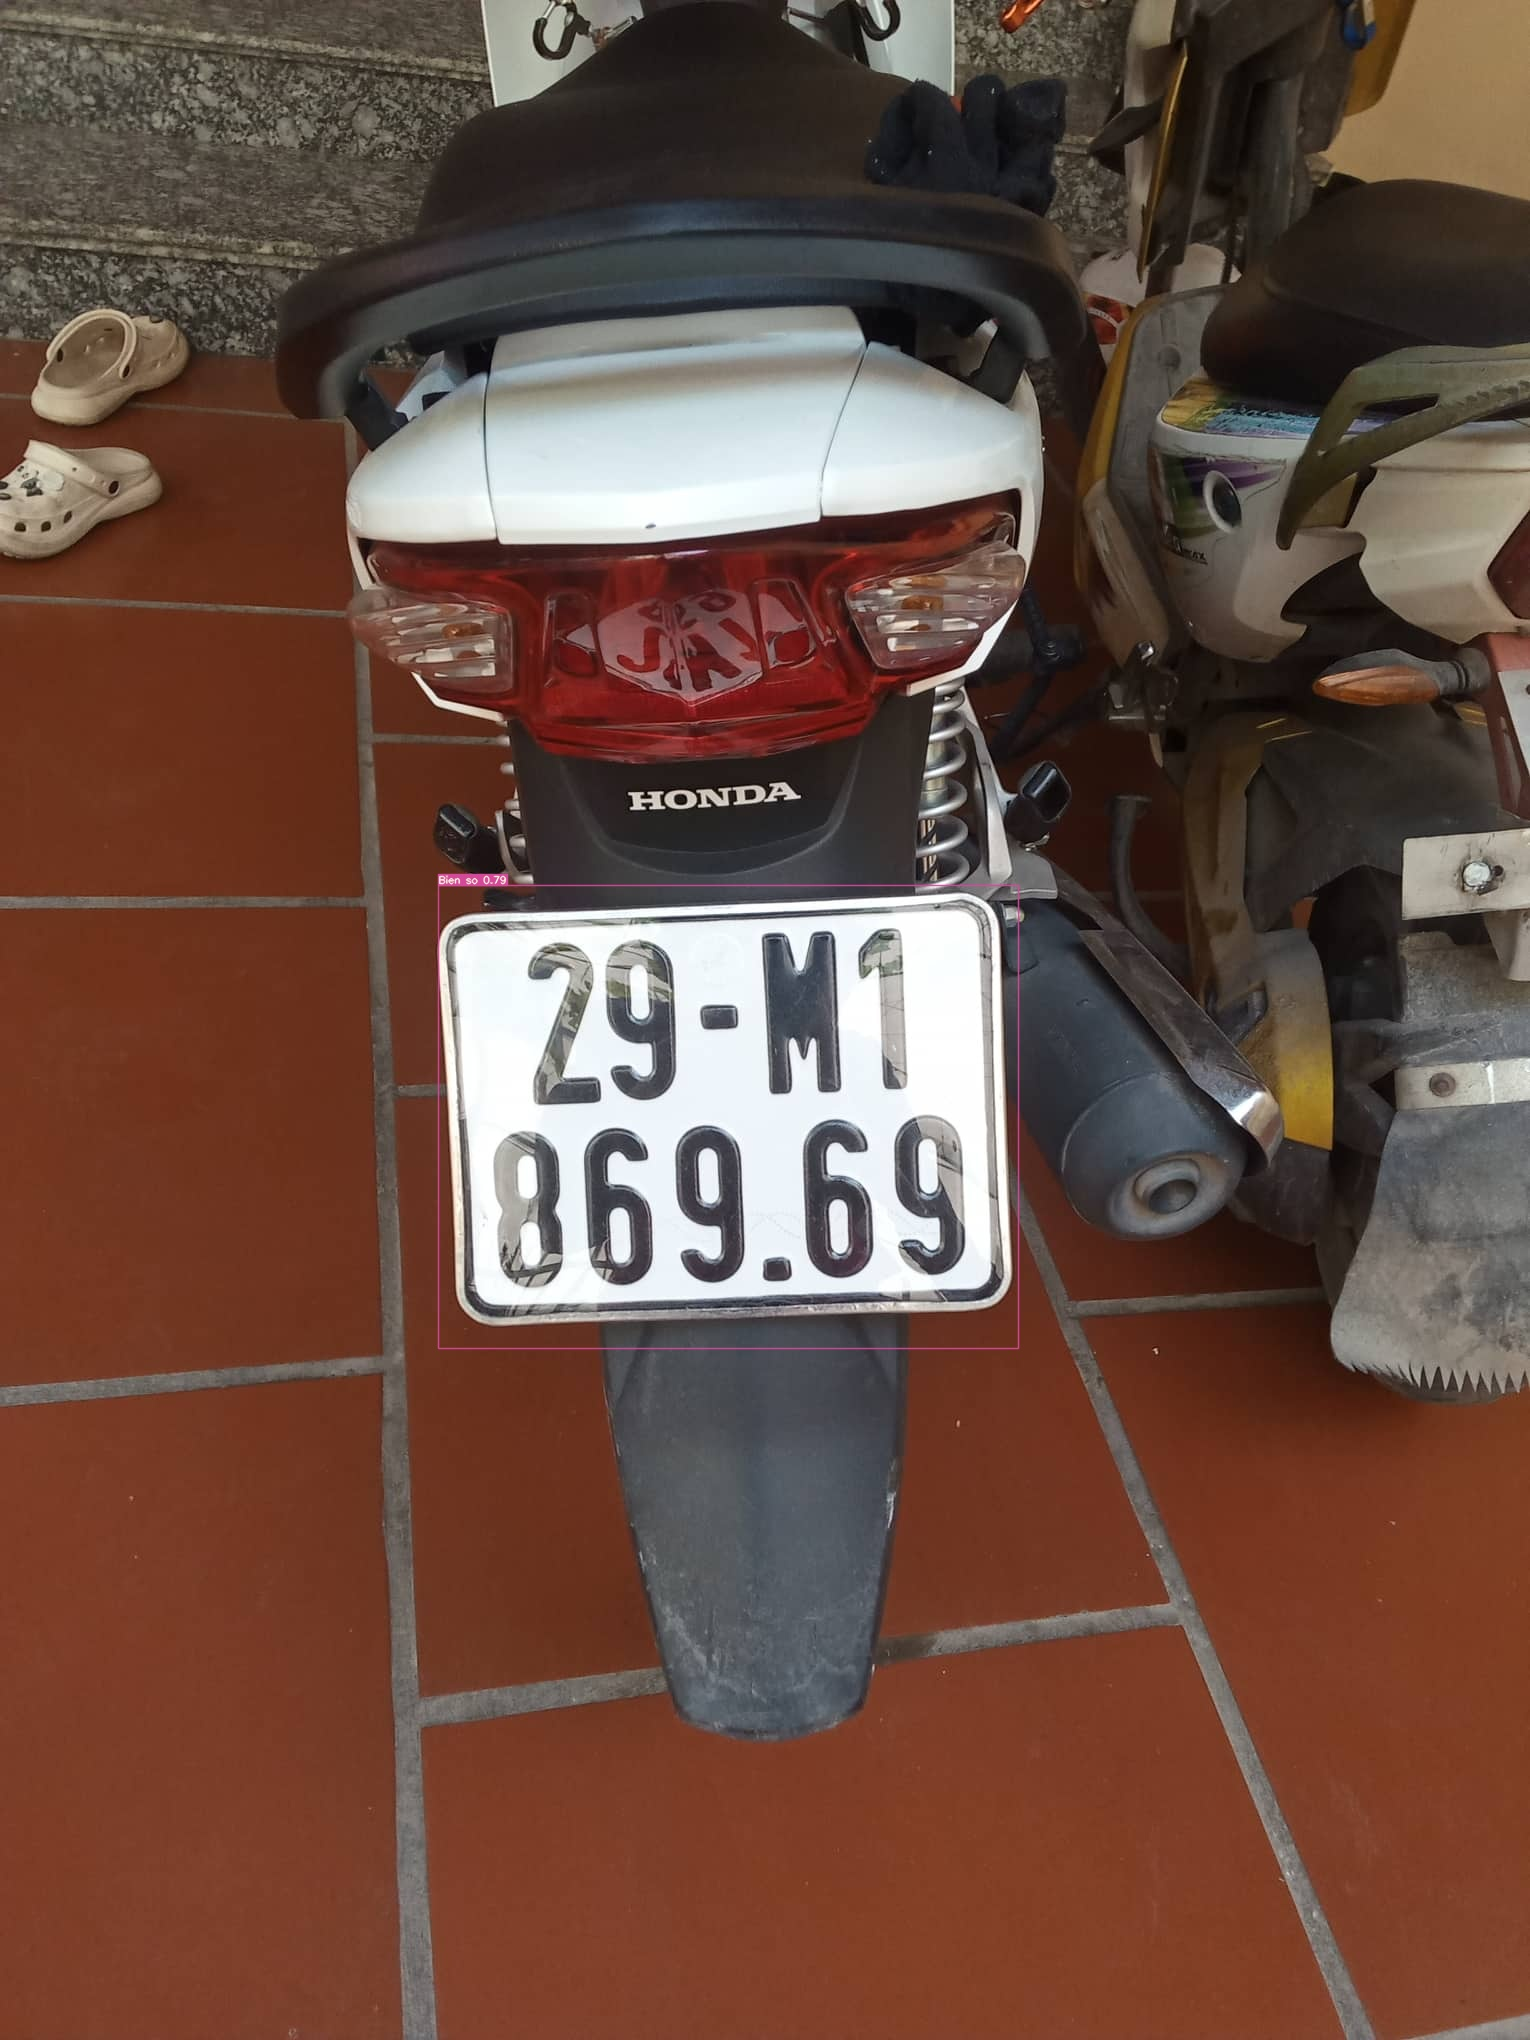

In [ ]:
# Xem ảnh đã nhận diện
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/detect/exp4/test1.jpg"))

In [ ]:
path = "/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/detect/exp6/labels/test1.txt"
with open(path, "r") as f:
  datas = f.readlines()

In [ ]:
infor = datas[0][2:]
print(datas)
print(infor)
print(type(infor))

['0 0.475817 0.547304 0.379085 0.226961\n']
0.475817 0.547304 0.379085 0.226961

<class 'str'>


In [ ]:
import numpy as np

convert_in4 =  np.array(list(map(str.split, infor)), np.float32)
print(convert_in4)

In [2]:
# Thực hiện đánh giá nhận diện best
%cd /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
!python test.py --weights /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/train/exp14/weights/best.pt --data data/mydataset.yaml --task val

/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
Namespace(weights=['/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/train/exp14/weights/best.pt'], data='data/mydataset.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.65, task='study', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)

Running study_mydataset_best.txt point 256...
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 2.1.0+cu121 CPU

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6007596 parameters, 0 gradients
val: Scanning '/content/drive/MyDrive/NhanDienBienSoXeMay/data/MotorcycleLicensePlate/valid/labels.cache' images and labels... 174 found, 0 missing, 0 empty, 0 corrupted: 100% 174/174 [00:00<?, ?it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 

In [3]:
# Thực hiện đánh giá nhận diện best
%cd /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
!python test.py --weights /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/train/exp14/weights/best.pt --data data/mydataset.yaml --task val

/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
Namespace(weights=['/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/train/exp14/weights/best.pt'], data='data/mydataset.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.65, task='val', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 2.1.0+cu121 CPU

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6007596 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

val: Scanning '/content/drive/MyDrive/NhanDienBienSoXeMay/data/MotorcycleLicensePlate/valid/labels.cache' images and labels... 174 found, 0 missing, 0 empty, 0 corrupted: 100% 174/174 [00:00<?, ?it/s]
               Class      Images      Labels           P  

In [4]:
# Thực hiện đánh giá nhận diện best
%cd /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
!python test.py --weights /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/train/exp14/weights/best.pt --data data/mydataset.yaml --task test

/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
Namespace(weights=['/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/train/exp14/weights/best.pt'], data='data/mydataset.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.65, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 2.1.0+cu121 CPU

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6007596 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

test: Scanning '/content/drive/MyDrive/NhanDienBienSoXeMay/data/MotorcycleLicensePlate/test/labels' images and labels... 177 found, 0 missing, 0 empty, 0 corrupted: 100% 177/177 [00:53<00:00,  3.28it/s]
test: New cache created: /content/drive/MyDrive/NhanDie

In [5]:
# Thực hiện đánh giá nhận diện last
%cd /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
!python test.py --weights /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/train/exp14/weights/last.pt --data data/mydataset.yaml --task val

/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
Namespace(weights=['/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/train/exp14/weights/last.pt'], data='data/mydataset.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.65, task='val', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 2.1.0+cu121 CPU

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6007596 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

val: Scanning '/content/drive/MyDrive/NhanDienBienSoXeMay/data/MotorcycleLicensePlate/valid/labels.cache' images and labels... 174 found, 0 missing, 0 empty, 0 corrupted: 100% 174/174 [00:00<?, ?it/s]
               Class      Images      Labels           P  

In [6]:
# Thực hiện đánh giá nhận diện last
%cd /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
!python test.py --weights /content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/train/exp14/weights/last.pt --data data/mydataset.yaml --task test

/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7
Namespace(weights=['/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/train/exp14/weights/last.pt'], data='data/mydataset.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.65, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 2.1.0+cu121 CPU

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6007596 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

test: Scanning '/content/drive/MyDrive/NhanDienBienSoXeMay/data/MotorcycleLicensePlate/test/labels.cache' images and labels... 177 found, 0 missing, 0 empty, 0 corrupted: 100% 177/177 [00:00<?, ?it/s]
               Class      Images      Labels           P 